In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
# Install Kaggle API
!pip install --quiet kaggle

In [ ]:
# Choose kaggle.json that created for new API token in your account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chuka19952","key":"59adf3ec1a69d4cf4eee1dd082f0da38"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
# Check the file in its new directory
!ls /root/.kaggle/

kaggle.json


In [ ]:
# Check the file permission
!ls -l ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 66 Aug  9 17:29 /root/.kaggle/kaggle.json


In [ ]:
#Change the file permission
# chmod 600 file – owner can read and write
# chmod 700 file – owner can read, write and execute
!chmod 700 ~/.kaggle/kaggle.json

In [ ]:
#Dataset download API command

!kaggle datasets download -d odins0n/amex-parquet       

100% 8.64G/8.65G [00:42<00:00, 141MB/s]
100% 8.65G/8.65G [00:42<00:00, 217MB/s]


In [ ]:
%ls

amex-parquet.zip  kaggle.json  sample_data/


In [ ]:
# We unzip the downloaded files
!mkdir amexd
!unzip amex-parquet.zip -d amexd

Archive:  amex-parquet.zip
  inflating: amexd/test_data.parquet  
  inflating: amexd/train_data.parquet  


In [ ]:
#Reading in your data in parquet format, a compressed format of storing data
train = pd.read_parquet('amexd/train_data.parquet')
#test = pd.read_parquet('amexd/input/test_data.parquet')

In [ ]:
#checking dataset size


train.shape

(5531451, 191)

Over 5 million rows/customers and 191 variables including the target variable. This is a very large-sized, high dimensional and anonymized dataset and can pose great difficulty in visualizing or modelling. Hence the need for special helper functions for quick cleaning and EDA

In [ ]:
#Checking data types info

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5531451 entries, 0 to 5531450
Columns: 191 entries, customer_ID to target
dtypes: float32(185), int64(2), object(4)
memory usage: 4.1+ GB


dtypes: 

float32  - (185),

int64    - (2), 

object   - (4)


Note the memory usage: 4.1+ GB

Practically, we have just 4 object based features which we may need to deal with as regarding categorical encoding. And every other numeric features with missing values can be filled with either a dumb figure of -999 or 0 or we use the initial statistical mean and median to check how closely it mirrors the main population sample(i.e mean of sample before filling missing values). 

### How can I deal or process 5 million rows and 191 variables?

In [ ]:
#General data description
train.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,5.485466e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.529435e+06,5.529435e+06,791314.000000,3.873055e+06,5.257132e+06,5.531451e+06,5.529434e+06,5.531451e+06,5.531451e+06,4.319752e+06,5.531451e+06,4.812726e+06,5.455340e+05,5.531218e+06,5.531451e+06,5.509183e+06,2.389049e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.501888e+06,5.229959e+06,5.531451e+06,1.446866e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.531451e+06,5.531451e+06,5.346648e+06,2.540508e+06,5.481932e+06,5.531451e+06,5.531451e+06,2.597808e+06,5.531451e+06,5.424726e+06,5.531451e+06,4.933399e+06,5.524528e+06,5.531451e+06,4.773290e+06,5.531451e+06,5.529435e+06,2.393853e+06,5.531451e+06,5.529435e+06,623354.000000,5.529435e+06,5.314948e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.336978e+06,5.529435e+06,5.436534e+06,5.531451e+06,5.507743e+06,5.531451e+06,5.531451e+06,55856.000000,5.531451e+06,5.509678e+06,5.531451e+06,6.224970e+05,5.531451e+06,5.531450e+06,3.017539e+06,5.524528e+06,5.529435e+06,5.257132e+06,5.455512e+06,5.531451e+06,3.125330e+05,5.531451e+06,5.509678e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.505764e+06,1.472837e+06,5.531451e+06,5.531395e+06,5.531451e+06,5.531451e+06,5.336978e+06,5.531450e+06,5.531451e+06,5.501888e+06,5.531451e+06,3.814160e+05,5.529435e+06,5.531451e+06,5.531451e+06,3865.0,5.531451e+06,5.531451e+06,6004.000000,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531376e+06,5.531451e+06,5.529435e+06,5.501888e+06,5.531451e+06,5.531451e+06,5.374235e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.512427e+06,5.531006e+06,5.512858e+06,5.518604e+06,5.530817e+06,5.490796e+06,5.429903e+06,5.429903e+06,2.510020e+06,5.413490e+05,5.429903e+06,5.531451e+06,5.531395e+06,6.093050e+05,5.402748e+06,5.529435e+06,2.893800e+04,5.529854e+06,31334.000000,31334.000000,33632.000000,5.528801e+06,5.531398e+06,4.130516e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.414635e+06,5.531451e+06,5.429903e+06,5.429903e+06,5.530761e+06,71478.000000,5.429903e+06,5.429903e+06,542577.000000,5.488735e+06,5.531451e+06,194699.000000,1.946990e+05,1.946990e+05,1.946990e+05,1.946990e+05,5.429903e+06,5.490819e+06,5.429903e+06,944408.000000,5.429903e+06,5.490724e+06,5.429903e+06,5.531451e+06
mean,6.563343e-01,1.531172e-01,1.240101e-01,6.214890e-01,7.880273e-02,2.258454e-01,5.978473e-02,1.325390e-01,0.184974,1.546841e-01,1.184431e-01,1.725543e-01,2.521866e-01,8.311187e-02,4.751791e-02,4.754784e-01,4.071096e-01,3.816244e-01,1.919254e-01,1.521173e-01,1.860835e-01,4.505811e-01,1.744348e-01,1.450789e-01,1.895235e-01,1.208287e-01,1.800505e-01,6.012886e-01,2.316002e-01,7.618338e-02,8.810536e-02,1.109685e-01,2.441923e-01,9.846390e-01,3.120413e-02,2.231380e-01,9.369955e-02,3.275998e-01,2.980905e-01,2.037095e-01,1.007155e-01,3.459406e-02,2.155313e-01,7.441475e-02,1.011546e-01,3.624226e-01,3.761549e-0

In [ ]:
#checking for total missing values

train.isnull().sum().sum()

160858968

In [ ]:
#checking for missing values by column

train.isnull().sum()

customer_ID          0
S_2                  0
P_2              45985
D_39                 0
B_1                  0
B_2               2016
R_1                  0
S_3            1020544
D_41              2016
B_3               2016
D_42           4740137
D_43           1658396
D_44            274319
B_4                  0
D_45              2017
B_5                  0
R_2                  0
D_46           1211699
D_47                 0
D_48            718725
D_49           4985917
B_6                233
B_7                  0
B_8              22268
D_50           3142402
D_51                 0
B_9                  0
R_3                  0
D_52             29563
P_3             301492
B_10                 0
D_53           4084585
S_5                  0
B_11                 0
S_6                  0
D_54              2016
R_4                  0
S_7            1020544
B_12                 0
S_8                  0
D_55            184803
D_56           2990943
B_13             49519
R_5        

In [ ]:
# Check for percentage of defaults(1) to percentage of non-defaults(0)
Percentage=len(train[train['target']==1])*100/len(train[train['target']==0])
Percentage
#Only about 33.1% of the data are with defaults

33.17302992934773

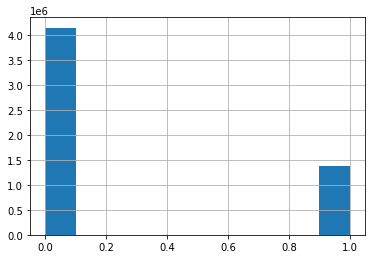

In [ ]:
#Visualizing the target properties

train['target'].hist()

##### We are dealing with an imbalanced dataset as far as the target is concerned.So, how do we deal with an imbalanced case like this?

-- Down sampling


-- Up sampling

Note: The goal of sampling should be done in such a way that one or more statistical properties of both subsets are uniform or nearly same e.g mean, median and quartiles. The ensures that the shape of the original data population is also retained.All so that the sample needs to be unbiased.



### Random Sampling

In [ ]:
#nt = train.sample(500)
nt = train.sample(frac=.05, random_state=44) #frac returns the designated fraction of
                                             #the dataframe len(train)

#Random state returns the same rows if you set same state, for reproducibility
#frac returned 5% of the whole train dataset.

In [ ]:
nt.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
2177082,6494c921991acd5ad3d8dc1a3b6567e94b982885b38257...,2017-08-08,0.872988,0.002188,0.001350,0.819609,0.007424,NaN,0.006814,0.006315,NaN,NaN,0.001174,0.008681,0.588817,0.007713,0.002131,0.440448,0.446685,0.095065,NaN,0.217298,0.017407,0.002463,NaN,0.340054,0.008935,0.000310,0.152065,0.499266,0.299860,NaN,0.008461,0.007702,1.001748,1.003349,0.009651,NaN,0.007425,0.007665,0.048941,NaN,0.001241,0.006436,0.007869,NaN,0.001708,0.426588,0.003752,0.032929,0.003343,0.280469,0.215809,CO,O,0.007931,0.001267,NaN,1.008298,0.009399,NaN,0.005581,6.0,0.194014,0.006125,0.000441,0.005317,0.009795,0.008798,0.002832,0.013954,0.007392,0.505343,0.004716,NaN,0.000603,0.006128,0.006259,NaN,0.007437,0.007356,0.200853,0.000093,0.003684,0.000994,0.001122,0.007204,NaN,0.008155,0.008584,0.000220,0.007111,0.003735,0.003504,NaN,0.009514,1.003868,0.005903,0.000235,0.008771,0.001421,0.001408,0.009061,0.008817,NaN,0.0,0.001541,0.000376,NaN,0.005246,0.004121,NaN,1,0.005147,0.001886,0.006080,0.001839,0.002157,0.006691,1.008146,0.007358,0.009944,0.006751,0.508824,0.002909,0.009219,0.006200,0.007854,0.006043,0.001966,0.297439,0.135592,0.081383,0.969253,0.003903,0.007678,0.003927,0.004304,NaN,NaN,0.006522,0.007413,0.007065,NaN,1.008036,1.0,NaN,0.001278,NaN,NaN,NaN,1.001028,0.010361,NaN,0.008965,1.0,0.538757,0.0,4.0,0.523020,0.525908,0.0,0.517548,0.148504,0.005459,0.182377,0.000501,1.0,0.000046,1.003170,0.002969,0.008779,NaN,0.007397,0.001984,NaN,0.009576,0.005546,NaN,NaN,NaN,NaN,NaN,0.003302,0.000977,0.002079,NaN,0.001405,0.007080,0.007900,0
4034855,ba7df61cc758c46cdb93427d73e9c63cea5d1c43e3defd...,2017-11-18,0.292157,0.918274,0.338099,0.004174,0.002227,NaN,0.861309,0.254684,NaN,NaN,0.754205,0.270639,0.105558,0.022281,0.005546,0.438863,0.311321,0.826779,NaN,0.009239,0.332048,1.003320,NaN,0.007223,0.490054,0.007699,0.061098,0.575918,0.030470,0.030821,0.008960,0.289386,1.004058,1.005471,0.005452,NaN,0.014154,0.001099,0.847239,NaN,0.004410,0.008787,0.709337,NaN,0.076410,0.486128,0.129454,0.738399,0.009584,0.289638,0.008899,CO,R,0.105737,1.003837,0.880998,0.101978,0.005737,NaN,1.006255,5.0,0.184384,0.005016,0.001050,0.002567,0.006693,0.005706,0.751817,0.010873,0.005420,0.500279,0.318676,NaN,0.004324,0.500706,0.539040,NaN,0.004125,0.004219,NaN,0.136561,0.132236,0.002997,0.009899,0.003821,NaN,0.006986,0.005265,0.008143,0.001124,0.003053,0.000909,NaN,0.003429,1.001916,0.275965,0.009886,0.000222,0.006111,0.005820,0.004688,0.004556,NaN,0.0,0.000241,0.007387,NaN,0.008309,0.003215,NaN,1,0.007595,0.004296,1.005976,0.008258,0.008671,0.002668,0.005965,0.005617,0.005704,0.007400,0.006962,0.005370,0.009127,0.006437,0.006918,0.005768,0.002627,0.326369,0.131164,0.162284,0.970062,0.009516,0.453972,1.004710,0.980479,0.447073,NaN,0.334657,0.005553,0.333915,NaN,1.005739,7.0,NaN,0.004484,NaN,NaN,NaN,0.007857,0.303607,NaN,0.203663,0.0,0.127879,0.0,4.0,0.129603,0.122225,0.0,0.577848,0.429744,0.001968,0.227919,0.004791,1.0,0.006921,0.005016,0.003848,0.004524,NaN,0.008799,0.006453,NaN,0.008501,0.009320,NaN,NaN,NaN,NaN,NaN,0.0

In [ ]:
# Check for percentage of defaults(1) to percentage of non-defaults(0)
Percentage=len(nt[nt['target']==1])*100/len(nt[nt['target']==0])
Percentage
#Only about 36.% of the data are with defaults

33.04902512591823

In [ ]:
nt.shape

(276573, 191)

In [ ]:
nt.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,274224.000000,2.765730e+05,276573.000000,2.764710e+05,2.765730e+05,225523.000000,2.764710e+05,2.764710e+05,39409.000000,1.934960e+05,2.627890e+05,2.765730e+05,2.764710e+05,2.765730e+05,2.765730e+05,215611.000000,276573.000000,240258.000000,27021.000000,276561.000000,276573.000000,2.754890e+05,119335.000000,2.765730e+05,2.765730e+05,2.765730e+05,275085.000000,261529.000000,276573.000000,7.232500e+04,2.765730e+05,2.765730e+05,2.765730e+05,276471.000000,2.765730e+05,225523.000000,276573.000000,2.765730e+05,267166.000000,127231.000000,2.740990e+05,2.765730e+05,2.765730e+05,129902.000000,276573.000000,271299.000000,2.765730e+05,246293.000000,276232.000000,276573.000000,238496.000000,2.765730e+05,2.764710e+05,1.198460e+05,2.765730e+05,2.764710e+05,31200.000000,2.764710e+05,265765.000000,276573.000000,2.765730e+05,2.765730e+05,2.765730e+05,2.668960e+05,2.764710e+05,2.717590e+05,2.765730e+05,2.753540e+05,276573.000000,276573.000000,2704.000000,2.765730e+05,2.754810e+05,2.765730e+05,3.130300e+04,2.765730e+05,2.765730e+05,150955.000000,276232.000000,2.764710e+05,2.627890e+05,2.727340e+05,2.765730e+05,15516.000000,2.765730e+05,2.754810e+05,2.765730e+05,2.765730e+05,2.764710e+05,2.752470e+05,7.394700e+04,2.765730e+05,276568.000000,276573.000000,2.765730e+05,2.668960e+05,2.765730e+05,2.765730e+05,2.750850e+05,2.765730e+05,1.890800e+04,276471.000000,2.765730e+05,2.765730e+05,182.0,2.765730e+05,2.765730e+05,302.000000,276573.000000,2.765730e+05,2.765730e+05,2.765730e+05,2.765730e+05,2.765700e+05,2.765730e+05,2.764710e+05,2.750850e+05,2.765730e+05,2.765730e+05,2.687070e+05,2.765730e+05,2.765730e+05,2.765730e+05,2.765730e+05,2.765730e+05,2.765730e+05,275685.000000,276558.000000,275710.000000,275911.000000,2.765430e+05,2.745060e+05,2.714100e+05,2.714100e+05,125151.000000,26806.000000,2.714100e+05,2.765730e+05,276570.000000,30429.000000,270091.000000,276471.000000,1500.000000,2.764880e+05,1544.000000,1544.000000,1653.000000,2.764410e+05,2.765700e+05,2.068380e+05,2.677510e+05,267751.000000,267751.000000,267751.000000,267751.000000,267751.000000,267751.000000,267751.000000,267751.000000,2.677510e+05,2.677510e+05,267751.000000,2.677510e+05,270694.000000,2.765730e+05,2.714100e+05,2.714100e+05,2.765380e+05,3707.000000,2.714100e+05,2.714100e+05,26866.000000,2.744080e+05,2.765730e+05,9622.000000,9.622000e+03,9.622000e+03,9.622000e+03,9622.000000,2.714100e+05,2.745090e+05,2.714100e+05,46799.000000,2.714100e+05,2.745010e+05,2.714100e+05,276573.000000
mean,0.656402,1.535671e-01,0.123717,6.211981e-01,7.899561e-02,0.225720,5.987656e-02,1.325017e-01,0.182201,1.544457e-01,1.186123e-01,1.726583e-01,2.529356e-01,8.424693e-02,4.804528e-02,0.475543,0.408221,0.381399,0.191169,0.149918,0.185725,4.493999e-01,0.175708,1.448566e-01,1.888532e-01,1.204388e-01,0.179950,0.600992,0.227188,7.675377e-02,9.011091e-02,1.106565e-01,2.436403e-01,0.984984,3.160277e-02,0.222983,0.095300,3.282353e-01,0.297695,0.203964,1.026787e-01,3.541209e-02,2.151110e-01,0.073775,0.101956,0.362338,3.765272e-01,0.429688,0.054015,0.375597,0.190645,4.006294

In [ ]:
# function that creates random sample 
def random_sampling(df, n):
    random_sample = np.random.choice(df,replace = False, size = n)
    return(random_sample)


In [ ]:
randomSample = random_sampling(train, 500)
randomSample.head()

In [ ]:
# Check for percentage of defaults(1) to percentage of non-defaults(0)
Percentage=len(train[train['target']==1])*100/len(train[train['target']==0])
Percentage
#Only about 33.1% of the data are with defaults

# APPLYING DOWNSAMPLING USING SKLEARN'S RESAMPLE FUNCTIONS

- The goal is to create a new and lighter dataset and

- deal with the imbalance problem as well.

- Also reduce bias to one class

In [ ]:
#First, We seperate the data based on the target variable.

dflt = train[train["target"] == 1]
n_dflt =  train[train["target"] == 0]
print(dflt.shape)
print(n_dflt.shape)

(1377869, 191)
(4153582, 191)


In [ ]:
# saving the dflt dataframe
dflt.to_csv('dflt.csv')

In [ ]:
#Resampling the most rep class to same length with less rep class

from sklearn.utils import resample
ndflt_downsample = resample(n_dflt,
             replace=True,
             n_samples=len(dflt),
             random_state=42)

print(ndflt_downsample.shape)


(1377869, 191)


In [ ]:
# saving the ndflt downsampled dataframe
ndflt_downsample.to_csv('ndflt downsamp.csv')

Next, to create a final dataset, we can concatenate our original dflt dataset with the down-sampled n_dflt dataset. The following script concatenates the two datasets and again prints the class distribution and a pie chart for the non-defaulters(n_dflt) and the defaulters(dflt)

In [ ]:
#Joining the datasets back together  #crashes

data_downsampled = pd.concat([ndflt_downsample, dflt])



In [ ]:
# #ploting the distro                 #crashes
# print(data_downsampled["target"].value_counts())

# data_downsampled.groupby('target').size().plot(kind='pie',
#                                        y = "target",
#                                        label = "plot of resampled",
#                                        autopct='%1.1f%%')

In [ ]:
#combining both datasets

data_downsampled = pd.concat([pd.read_csv('dflt.csv'), pd.read_csv('ndflt downsamp.csv')])

In [ ]:
# saving the ndflt downsampled dataframe
data_downsampled.to_csv('comb_downsamp.csv')

In [ ]:
data_downsampled.shape

(2755738, 192)

In [ ]:
big_df = pd.read_csv('comb_downsamp.csv')

In [ ]:
#Extracting a random smaller sized sample

small_df = data_downsampled.sample(400)

# Data Cleaning

In [ ]:
# Writing helper fuction to fill missing values across all data types, such that we 
#would initially fill all int features with median and floats with mean but objects with mode.

def cleaning(df:pd.DataFrame):
    for i in df.columns:
        if df[i].dtype == 'int64':
            df[i]=df[i].fillna(df[i].median())
            
        elif df[i].dtype == 'float32':
            df[i]=df[i].fillna(df[i].mean())
            
        elif df[i].dtype == 'object':
             df[i]=df[i].fillna(df[i].mode()[0])
                
    print('Missing values now', df.isnull().sum().sum())       
    return df        
        


In [ ]:
# Cleaning and storing cleaned data in new variable
new_train = cleaning(train)

## ENCODING DATA

We start by writing Helper function to encode data

In [ ]:
# Defining function for encoding all categorical columns

def enc_func(df: pd.DataFrame, columns):
    
    df  = pd.get_dummies(data=df, columns=columns,
          drop_first=True)
    
    print('The shape of the new data is:', df.shape)
    return df

In [ ]:
#Defining X and y i.e seperating dependent from independent variables

X = new_train.drop(['customer_ID','target'], axis=1)
y = new_train['target']

In [ ]:
# Categorical columns as follows: storing them in a list

cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [ ]:
#Cleaning the data and storing it in a new variable

enc_train = enc_func(X, cat_cols)